<div class="alert alert-block alert-info">

# Exercises

<div class="alert alert-block alert-info">

## Exercises: Hypothesis

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be).

### Then give an example of what a true positive, true negative, type I and type II errors would look like.

*Note that some of the questions are intentionally phrased in a vague way. 
It is your job to reword these as more precise questions that could be tested.*

### 1. Has the network latency gone up since we switched internet service providers?

### Null hypothesis (H₀):

    There is no significant difference or decrease in latency between spectrum and google fiber in online games.

### Alternative hypothesis (Hₐ):

    There is a significant difference in latency between spectrum and google fiber in online games. 

### True positive: 

    Rejecting the null hypothesis when there is actually a significant difference in latency between spectrum and google fiber in online games.

### True negative: 

    Accepting the null hypothesis when there is no significant difference in latency between spectrum and google fiber in online games.

### Type I error (False Positive): 

    Rejecting the null hypothesis when there is actually no significant difference in latency between spectrum and google fiber in online games.

    Example: Concluding that there is a significant difference in latency between spectrum and google fiber, but in reality, there is no difference.

### Type II error (False Negative):

    Accepting the null hypothesis when there is actually a significant difference in latency between spectrum and google fiber in online games.

    Example: Concluding that there is no significant difference in latency between spectrum and google fiber, but in reality, there is a difference.

### 2. Is the website redesign any good?

### Null Hypothesis:

    The clickthrough rate is not affected or increase by hiring a better web designer.

### Alternative Hypothesis:

    The clickthrough rate has decreased after hiring a better web designer.

### True Positive:

    The data analysis reveals a significant decrease in the clickthrough rate after hiring a better web designer, which aligns with the alternative hypothesis.

### True Negative:

    The data analysis does not show any change in the clickthrough rate after hiring a better web designer, which aligns with the null hypothesis.

### Type I Error (False Positive):

    The data analysis indicates a significant decrease in the clickthrough rate after hiring a better web designer, leading to the rejection of the null hypothesis. 

    However, in reality, there is no actual change in the clickthrough rate, and the decrease is coincidental or due to other factors.

### Type II Error (False Negative):

    The data analysis does not show any change in the clickthrough rate after hiring a better web designer, failing to reject the null hypothesis. 

    However, in reality, there is a decrease in the clickthrough rate, which is genuinely caused by hiring a better web designer.

### 3. Is our television ad driving more sales?

### Null hypothesis: 

    Hiring a better director for the television ad has no effect or a decrease on the number of people using the discount code from the commercial.

### Alternative hypothesis:

    Hiring a better director for the television ad increases the number of people using the discount code from the commercial.

### True positive:

    The number of people using the discount code has significantly increased after hiring the better director for the television ad, supporting the alternative hypothesis.

### True negative:

    The number of people using the discount code remains unchanged or does not significantly increase after hiring the better director, supporting the null hypothesis.

### Type I error (False Positive):

    The number of people using the discount code appears to have significantly increased after hiring the better director, but it is just due to random chance. In reality, the null hypothesis is true.

### Type II error (False Negative):

    The number of people using the discount code does not appear to have significantly increased after hiring the better director, but in reality, it has. This means we fail to reject the null hypothesis, even though the alternative hypothesis is true.

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be).

### Then give an example of what a true positive, true negative, type I and type II errors would look like.

*Note that some of the questions are intentionally phrased in a vague way. 
It is your job to reword these as more precise questions that could be tested.*

<div class="alert alert-block alert-info">

## Exercises: Correlations

### 1. Answer with the type of stats test you would use (assume normal distribution):

**1a. Is there a relationship between the length of your arm and the length of your foot?**

- Since these are both continuous variables, I would use the Spearman's Pearson correlation coefficient

**1b. Does smoking affect when or not someone has lung cancer?**

- I would use a chi-square test for independence, comparing observed frequencies in smokers and non-smokers to expected frequencies under independence.

**1c. Is gender independent of a person’s blood type?**

- I would use a chi-square test for independence, comparing observed frequencies of blood types and the expecting frequencies assuming independence.

**1d. Does whether or not a person has a cat or dog affect whether they live in an apartment?**

- I would again use a chi-square test for indendence, comparing observed frequencies of apartment living among cat owners, dog owners, and those with neither to the expected frequencies under independence. 

**1e. Does the length of time of the lecture correlate with a student's grade?**

- Since these are both continuous variables, I would use the Pearson correlation coefficient and assess the strength and direction of the linear relationship.

In [43]:
#standard ds imports
import pandas as pd
import numpy as np

#visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#custom imports
from env import db_url
import os

#stats imports
from scipy import stats

### 2a. Does tenure correlate with monthly charges?

- There is a correlation between monthly charges and tenure.
- With r only being .28, we can say the correlation is positive but weak

<Axes: xlabel='tenure', ylabel='monthly_charges'>

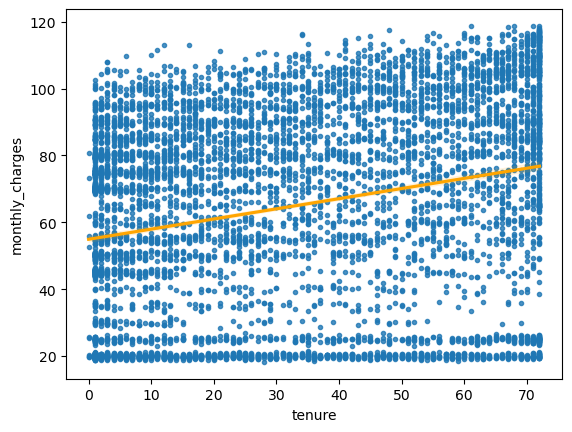

In [44]:
url = db_url('telco_churn')

query = '''SELECT *
        FROM customers'''

df = pd.read_sql(query, url)

# H0: There is no linear correlation between tenure & monthly charges
# Ha: There IS a linear correlation between tenure & monthly charges

#set alpha
α = 0.05

#create the dataframe for monthly charges and tenure only
charges_df = df[['monthly_charges', 'tenure']]

#tenure vs monthly charges
sns.regplot(x='tenure', y='monthly_charges', data = charges_df, marker='.', line_kws={'color' : 'orange'})

<Axes: >

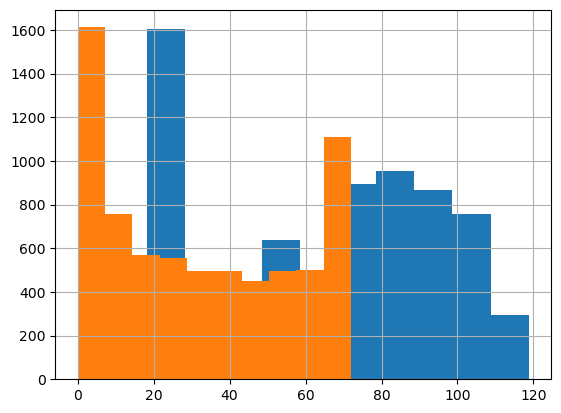

In [45]:
#visual test of distribution for monthly charges
charges_df.monthly_charges.hist()

#visual test of distribution for tenure
charges_df.tenure.hist()

In [46]:
def eval_dist(r, p, α=0.05):
    if p > α:
        return print(f"""The data is normally distributed""")
    else:
        return print(f"""The data is NOT normally distributed""")

In [47]:
def eval_Sresult(r, p, α=0.05):
    if p < α:
        return print(f"""Reject the null hypothesis. There is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")
    else:
        return print(f"""We fail to reject the null hypothesis that there is a linear correlation.
Spearman’s r: {r:2f}
P-value: {p}""")

In [48]:
#Since our features are not normally distributed, use Spearman
sr,sp = stats.spearmanr(charges_df.tenure, charges_df.monthly_charges)

eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.276417
P-value: 1.0271266876409408e-123


### 2b. Total charges?

- There is a linear correlation between tenure and total charges
- With an r of .89, it is a strong positive correlation.

In [49]:
# H0: There is no linear correlation between tenure and total charges
# Ha: There is a linear correlation between tenure and total charges

#set the alpha
α = 0.05

#create a df of only tenture and total charges
ttl_charges_df = df[['tenure', 'total_charges']]

#covert empty space into '0'
#change datatype to float
ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')

/var/folders/sn/k1pt9tkj3532_42jfk9zdjhc0000gn/T/ipykernel_47081/1364568916.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ttl_charges_df['total_charges']= ttl_charges_df['total_charges'].str.replace(' ', '0').astype('float')


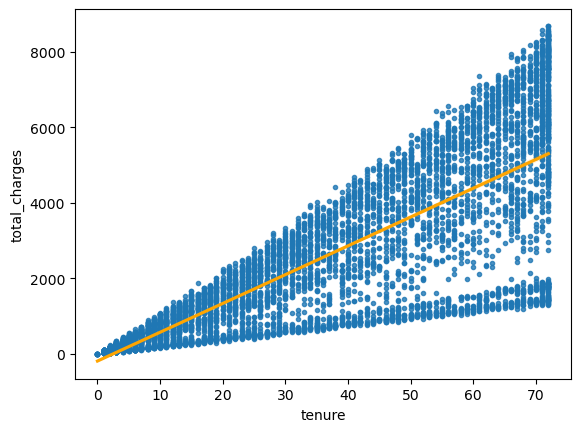

In [50]:
#plot our data
sns.regplot(x='tenure', y = 'total_charges', data=ttl_charges_df, marker='.', line_kws={'color': 'orange'})
plt.show()

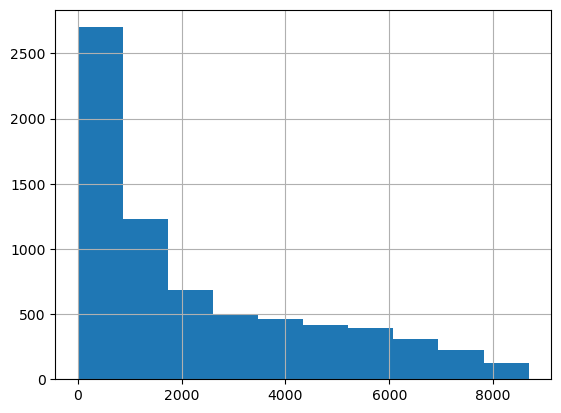

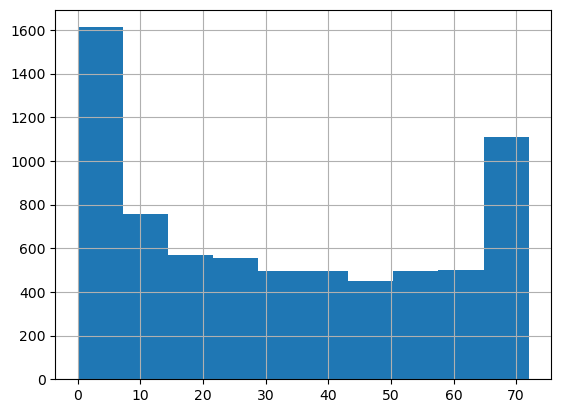

In [51]:
#visual check for distribution of total charges
ttl_charges_df.total_charges.hist()
plt.show()

#visual check for distribution of tenure
ttl_charges_df.tenure.hist()
plt.show()

In [52]:
#get r and p values using stats library
r,p = stats.shapiro(ttl_charges_df.total_charges)

#see those values
r,p

#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [53]:
# Since it's not normally distributed, use Spearman
sr,sp = stats.spearmanr(ttl_charges_df.tenure, ttl_charges_df.total_charges)
sr,sp

(0.8896957900597577, 0.0)

In [54]:
eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.889696
P-value: 0.0


### 2c. What happens if you control for phone and internet service?

- There is a moderate-strong positive correlation between tenure and monthly charges for customers who have only phone & internet service.

In [55]:
# H0: There is no linear correlation between tenure and monthly charges of phone & internet customers
# Ha: There is a linaer correlation between tenure and monthly charges of phone & internet customers

# set α
α = 0.05

In [56]:
#create a dataframe of only customers with phone service 
#and internet service type 1
phone_df = df[(df.phone_service == "Yes") & (df.internet_service_type_id == 1)][['monthly_charges', 'tenure']]

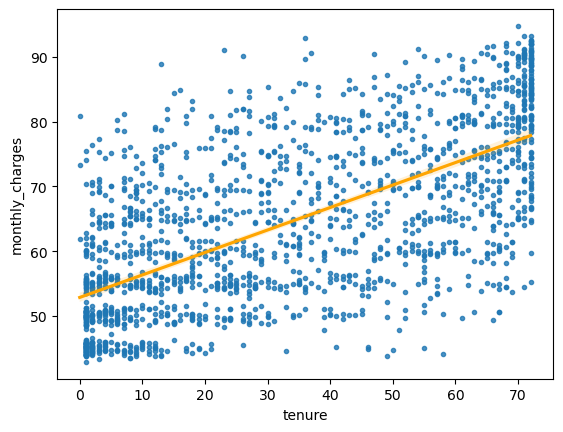

In [57]:
#visualize the data
sns.regplot(x='tenure', y = 'monthly_charges', data=phone_df, marker='.', line_kws={'color': 'orange'})
plt.show()

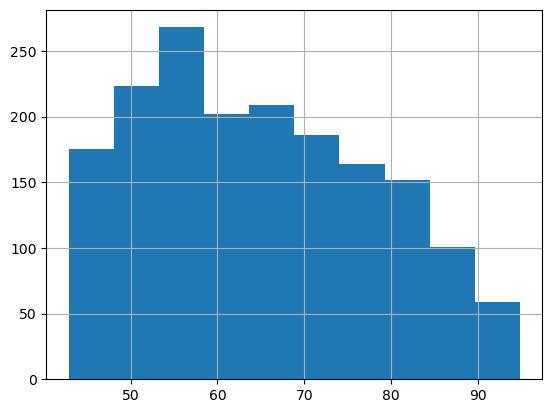

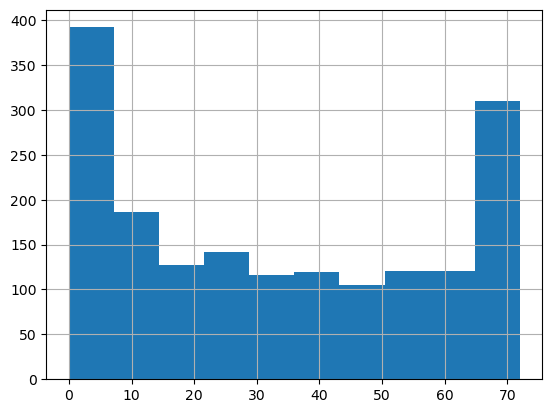

In [58]:
#visualization of distribution for monthly charges
phone_df.monthly_charges.hist()
plt.show()

#visualization of distribution for monthly
phone_df.tenure.hist()
plt.show()

In [59]:
#shapiro for monthly charges
r,p = stats.shapiro(phone_df.monthly_charges)

#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [60]:
#shapiro for tenure
r,p = stats.shapiro(phone_df.tenure)

#using the function we created
eval_dist(r,p)

The data is NOT normally distributed


In [61]:
sr,sp = stats.spearmanr(phone_df.tenure, phone_df.monthly_charges)
sr,sp

eval_Sresult(sr,sp)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.664471
P-value: 5.423601644635052e-222


### #3a. Is there a relationship between how long an employee has been with the company and their salary?

- We reject the null hypothesis. There is a weak positive correlation between tenure and salary. 

In [62]:
url_emp = db_url('employees')

query = '''
SELECT * 
FROM employees
JOIN salaries USING (emp_no)
WHERE to_date = '9999-01-01';
'''

df = pd.read_sql(query, url_emp)

In [63]:
# H0: There is no linear correlation between tenure and salary
# Ha: There is a linear correlation between tenure and salary

# set α
α = 0.05

In [64]:
#create a tenure column
df['tenure'] = (df.to_date - df.hire_date).astype(str).str.split(' ', expand = True)[0]

#turn this into an integer
df.tenure = df.tenure.astype(int)

#create the dataframe with the info we want
tenure_df = df[['tenure', 'salary']]

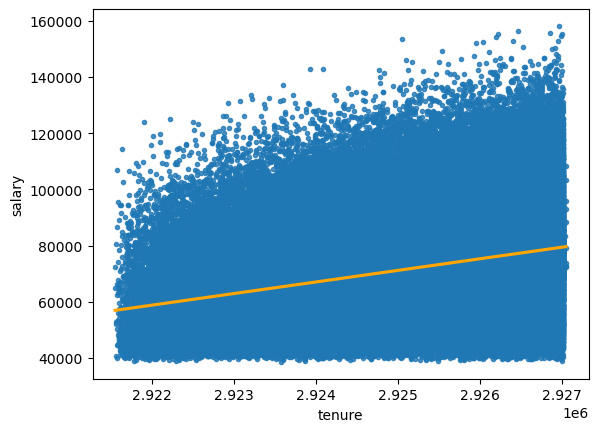

In [65]:
#plot tenure vs salary
sns.regplot(x='tenure', y = 'salary', data=tenure_df, marker='.', line_kws={'color': 'orange'})
plt.show()

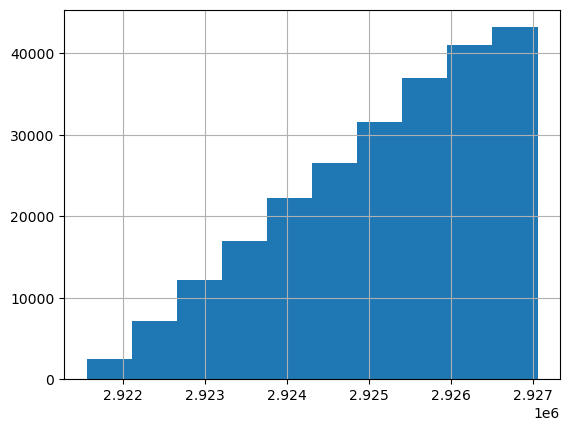

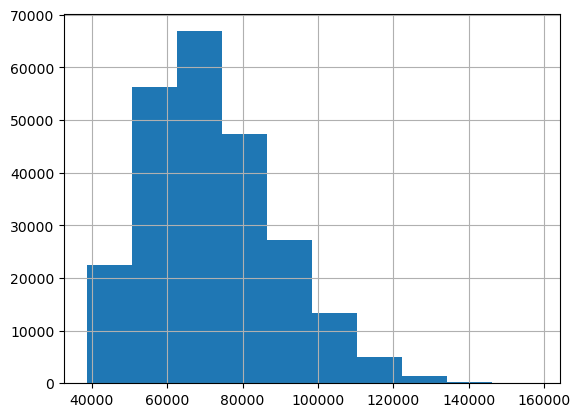

In [66]:
#visualize distribution for tenure
tenure_df.tenure.hist()
plt.show()

#visualize distribution for salary
tenure_df.salary.hist()
plt.show()

In [67]:
#shapiro for tenure
r,p = stats.shapiro(tenure_df.tenure)

eval_dist(r,p)

The data is NOT normally distributed


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [68]:
#shapiro for tenure
r,p = stats.shapiro(tenure_df.salary)

eval_dist(r,p)

The data is NOT normally distributed


In [69]:
# Since it's not normally distributed, use Spearman
sr,sp = stats.spearmanr(tenure_df.tenure, tenure_df.salary)

eval_dist(sr,sp)

The data is NOT normally distributed


### #3b. Is there a relationship between how long an employee has been with the company and the number of titles they have had?

- We reject $H_0$, the tenure median is not equal for the various number of titles.

- There is a difference in tenure and number of titles an employee has held.

In [70]:
# H0: There is no correlation between tenure and number of titles.
# Ha:: There is a correlation between tenure and number of titles

# set α
α = 0.05

In [71]:
query = '''
select 
    t.emp_no, 
    count(t.title) AS num_titles, 
    te.tenure
from titles t
join (select 
        emp_no, 
        datediff(now(), min(from_date)) AS tenure 
      from titles
      group by emp_no
      having max(to_date) = '9999-01-01') te 
on t.emp_no = te.emp_no
group by t.emp_no;        
'''

df = pd.read_sql(query, url_emp)

In [72]:
#create dataframe with only number of titles and tenure
df = df[['num_titles', 'tenure']]

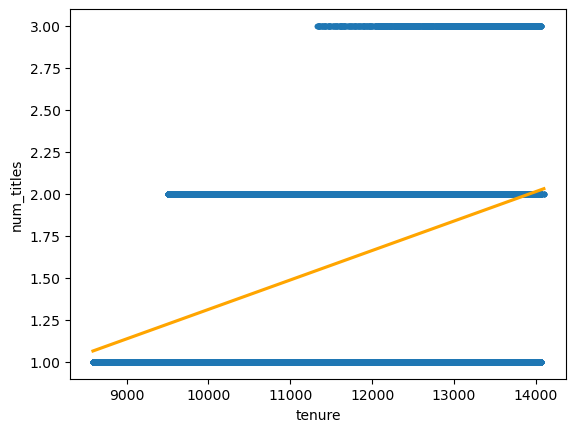

In [73]:
#visualize tenure and number of titles
sns.regplot(x='tenure', y = 'num_titles', data=df, marker='.', line_kws={'color': 'orange'})
plt.show()

In [74]:
#are there enough observations? (more than __)
df.num_titles.value_counts()

num_titles
2    125345
1    111892
3      2887
Name: count, dtype: int64

In [75]:
stats.kruskal(df.num_titles, df.tenure)

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

<Axes: title={'center': 'tenure'}, xlabel='num_titles'>

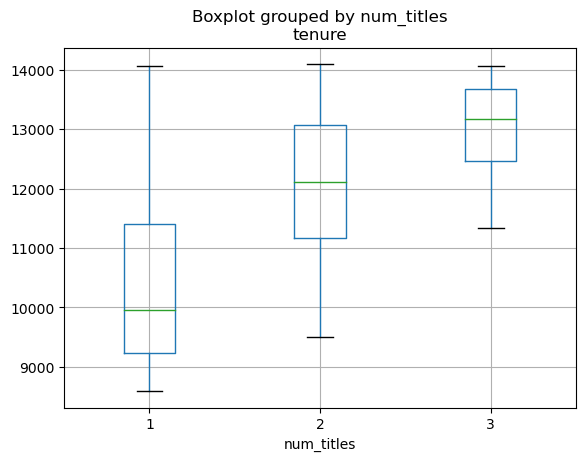

In [76]:
df.boxplot('tenure', by='num_titles')

### 4a. Is there a relationship between days and reaction time? (sleepstudy data)

- With a r of 0.52, there is a moderate positive correlation between days and reaction time

In [77]:
# H0: There is no linear correlation between days and reaction time
# Ha: There is a linear correlation between days and reaction time

# set α
α = 0.05

In [78]:
from pydataset import data

df = data('sleepstudy')

react_df = df[['Reaction','Days']]

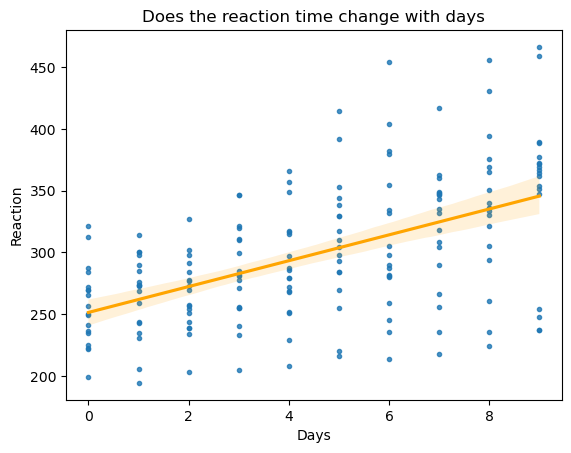

In [79]:
#plot relationships
sns.regplot(data=react_df, x='Days', y='Reaction', marker='.', line_kws=({'color': 'orange'}))

plt.title('Does the reaction time change with days')
plt.show()

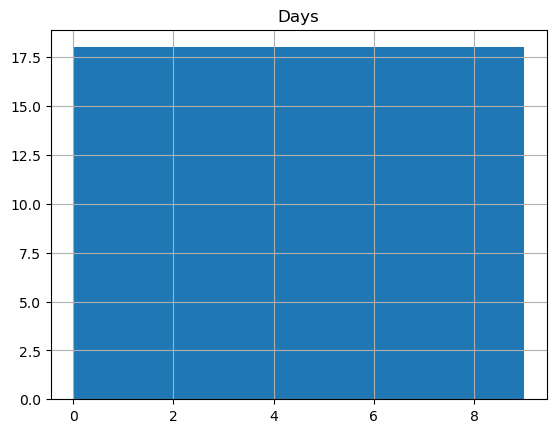

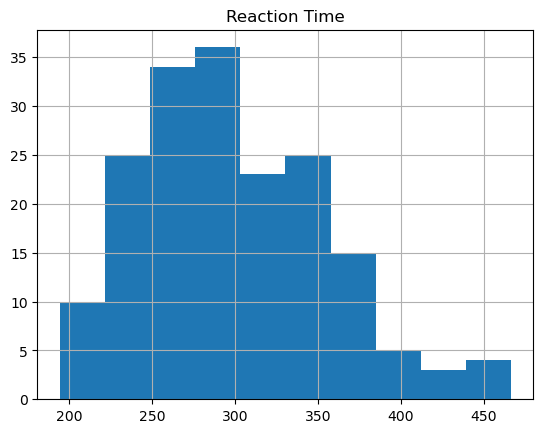

In [80]:
#visualize the distribution of days
react_df.Days.hist()
plt.title('Days')
plt.show()

#visualize the distribution of reaction time
react_df.Reaction.hist()
plt.title('Reaction Time')
plt.show()

In [81]:
# Since BOTH are not normally distributed, use Spearman
r,p = stats.spearmanr(react_df.Days, react_df.Reaction)

eval_Sresult(r,p)

Reject the null hypothesis. There is a linear correlation.
Spearman’s r: 0.522814
P-value: 5.132878057706873e-14


<div class="alert alert-block alert-info">

## Exercises: Comparison of Means

### 1. Answer with the type of test you would use (assume normal distribution):

1a. Is there a difference in grades of students on the second floor compared to grades of all students?
- T-Test (Parametric, categorical (floor) & continuous (grade))

1b. Are adults who drink milk taller than adults who don't drink milk?
- T-Test (Parametric, categorical (floor) & continuous (height))

1c. Is the price of gas higher in Texas or in New Mexico?
- T-Test (Parametric, categorical (Texas/NM) & continuous (gas prices))

1d. Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
- Chi Squared (Parametric, categorical (stress levels) & categorical (class))

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [82]:
import scipy.stats as stats

n1 = 40  # sample size for office #1
mean1 = 90  # mean for office #1
std1 = 15  # standard deviation for office #1

n2 = 50  # sample size for office #2
mean2 = 100  # mean for office #2
std2 = 20  # standard deviation for office #2

# Calculate the test statistic and p-value
t_stat, p_value = stats.ttest_ind_from_stats(mean1, std1, n1, mean2, std2, n2)

alpha = 0.05  # significance level

if p_value < alpha:
    print(f'P-Value: {p_value}. Reject the null hypothesis')
else:
    print(f'P-Value: {p_value}. Fail to reject the null hypothesis')

P-Value: 0.01020985244923939. Reject the null hypothesis


In [83]:
# 3. Load the mpg dataset and use it to answer the following questions:

import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats

mpg = data('mpg')

### 3a. Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

- H0: Cars from both 2008 and 1999 have the same gas mileage.
- H1: Cars from 2008 have a higher fuel efficiency than 1999

In [84]:
# Create a fuel efficiency column
mpg['fuel_efficiency'] = (mpg['cty'] + mpg['hwy']) / 2

mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5


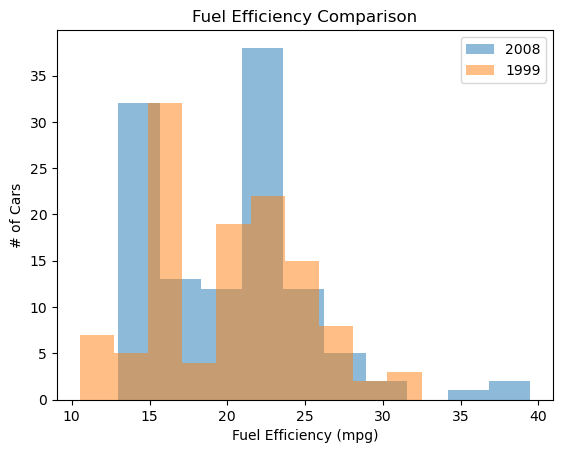

In [85]:
# Plot the two data sets
df08 = mpg[mpg['year'] == 1999]['fuel_efficiency']

df99 = mpg[mpg['year'] == 2008]['fuel_efficiency']

plt.hist(df08, alpha=0.5, label='2008')
plt.hist(df99, alpha=0.5, label='1999')
plt.title('Fuel Efficiency Comparison')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('# of Cars')
plt.legend()
plt.show()

# Normal enough to me.

In [86]:
t, p = stats.ttest_ind(df99, df08)

print(f'P-Value:{p}')

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

P-Value:0.8263744040323578
We fail to reject the null hypothesis.


### 3b. Are compact cars more fuel-efficient than the average car?

- H0: Compact cars and the average car have the same fuel efficiency.
- H1: Compact cars have a higher fuel efficiency.

In [87]:
mpg.value_counts('class')

# Based on the data, we assumed midsize to be the average in this case.

class
suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: count, dtype: int64

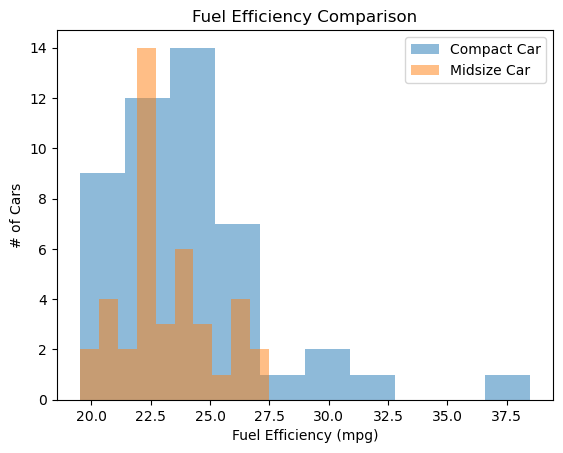

In [88]:
# Plot the two data sets
dfcomp = mpg[mpg['class'] == 'compact']['fuel_efficiency']

dfmid = mpg[mpg['class'] == 'midsize']['fuel_efficiency']

plt.hist(dfcomp, alpha=0.5, label='Compact Car')
plt.hist(dfmid, alpha=0.5, label='Midsize Car')
plt.title('Fuel Efficiency Comparison')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('# of Cars')
plt.legend()
plt.show()

# Normal enough to me.

In [89]:
t, p = stats.ttest_ind(dfcomp, dfmid)

print(f'P-Value:{p}')

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

P-Value:0.0587536821078566
We reject the null hypothesis.


### 3c. Do manual cars get better gas mileage than automatic cars?

- H0: Both manual cars and automatic cars have the same gas mileagee (fuel efficiency)
- H1: Manual cars have a higher fuel efficiency than automatic cars.

In [96]:
# Clean the transmission column
mpg['trans'] = mpg['trans'].apply(lambda x: 'auto' if 'auto' in x else 'manual')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto,f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual,f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual,f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto,f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto,f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto,f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual,f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto,f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual,f,18,26,p,midsize,22.0


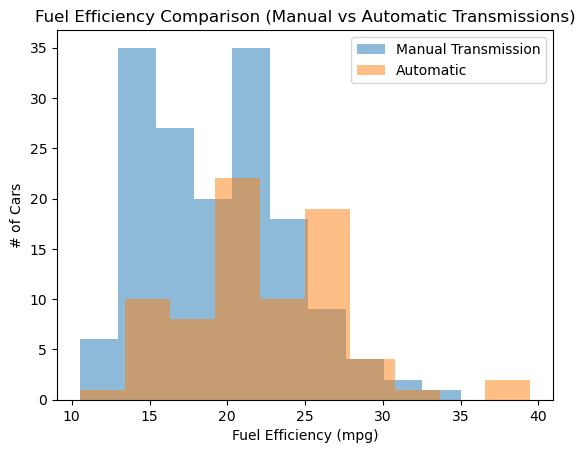

In [97]:
# Plot the two data sets
dfman = mpg[mpg['trans'] == 'auto']['fuel_efficiency']

dfauto = mpg[mpg['trans'] == 'manual']['fuel_efficiency']

plt.hist(dfman, alpha=0.5, label='Manual Transmission')
plt.hist(dfauto, alpha=0.5, label='Automatic')
plt.title('Fuel Efficiency Comparison (Manual vs Automatic Transmissions)')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('# of Cars')
plt.legend()
plt.show()

# Normal enough to me.

In [98]:
t, p = stats.ttest_ind(dfman, dfauto)

print(f'P-Value:{p}')

if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject null hypothesis.")
else:
    print("We reject the null hypothesis.")

P-Value:7.154374401145685e-06
We fail to reject null hypothesis.


<div class="alert alert-block alert-info">

# Notes: Hypothesis Testing

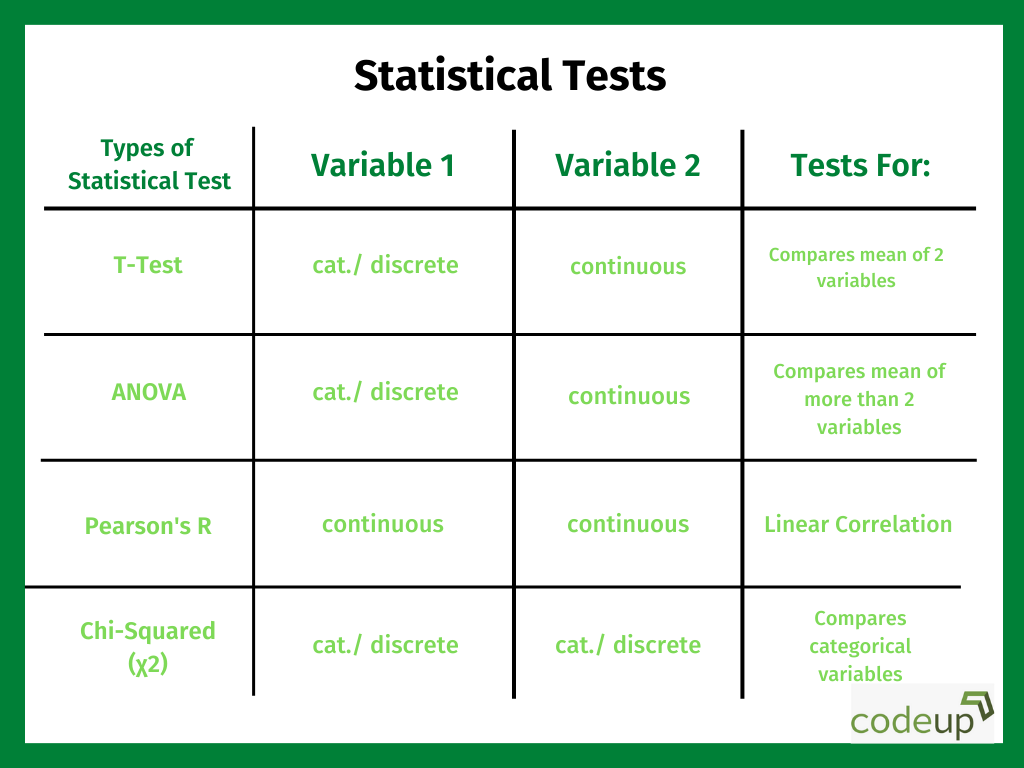
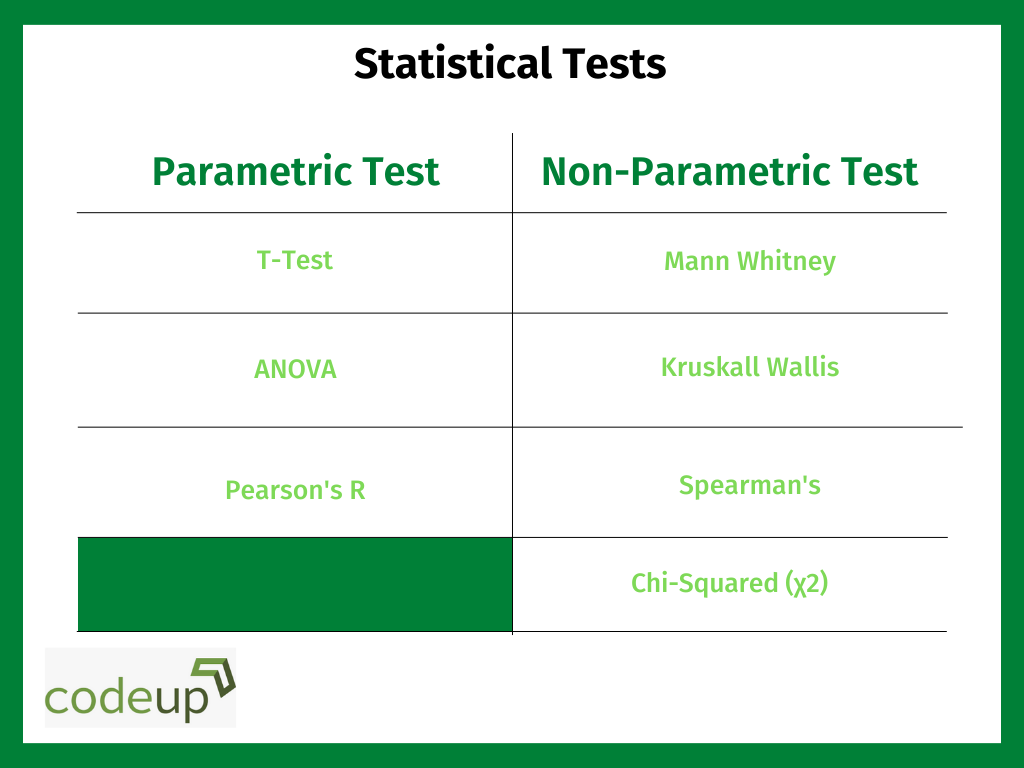

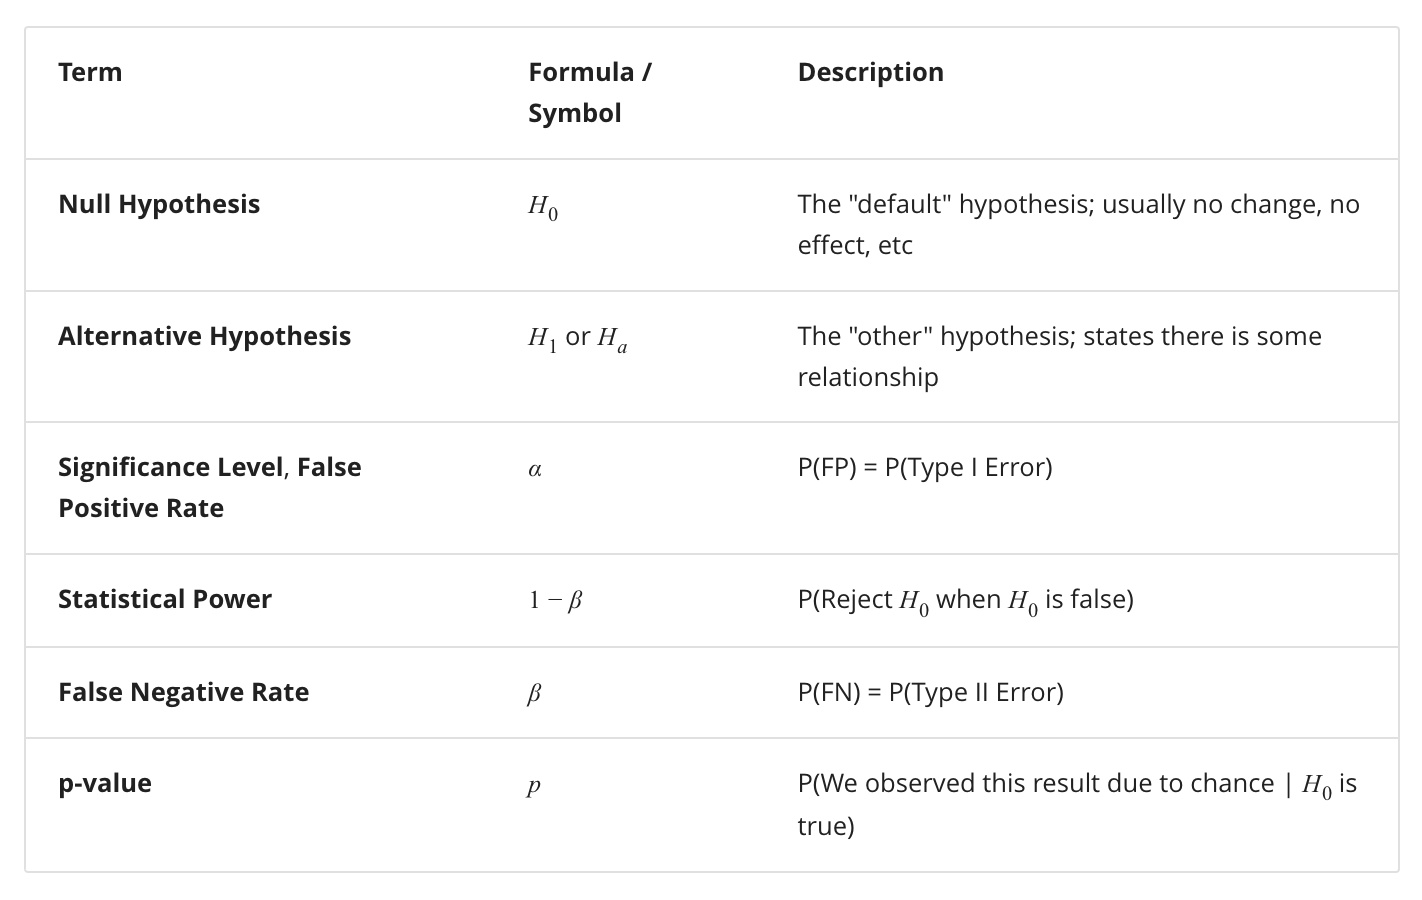

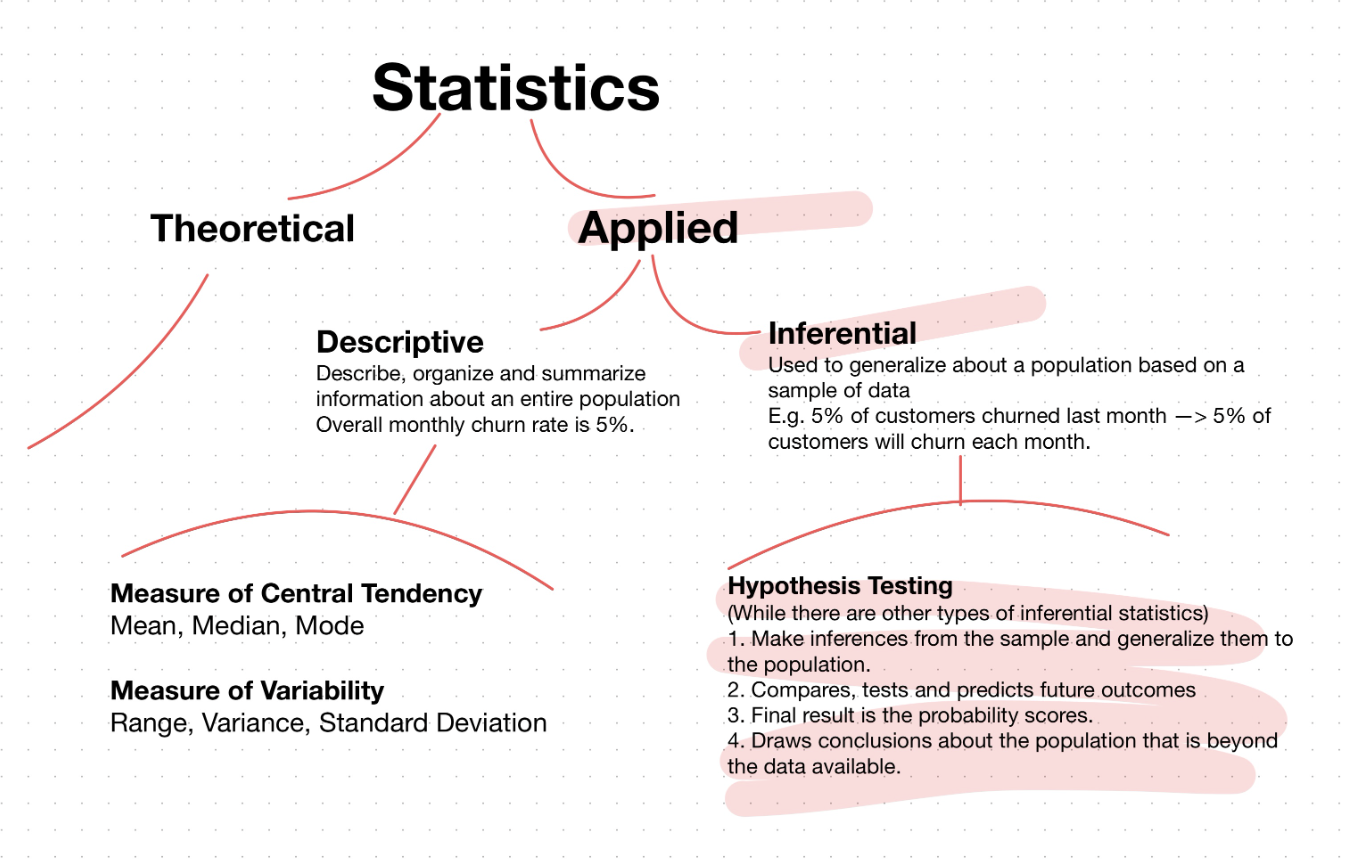

<div class="alert alert-block alert-info">

# Notes: Correlation Coefficient

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)

,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


In [93]:
stats.pearsonr(df['exam_score'], df['hours_studied'])

PearsonRResult(statistic=0.8351498542413308, pvalue=2.0762953315462545e-11)

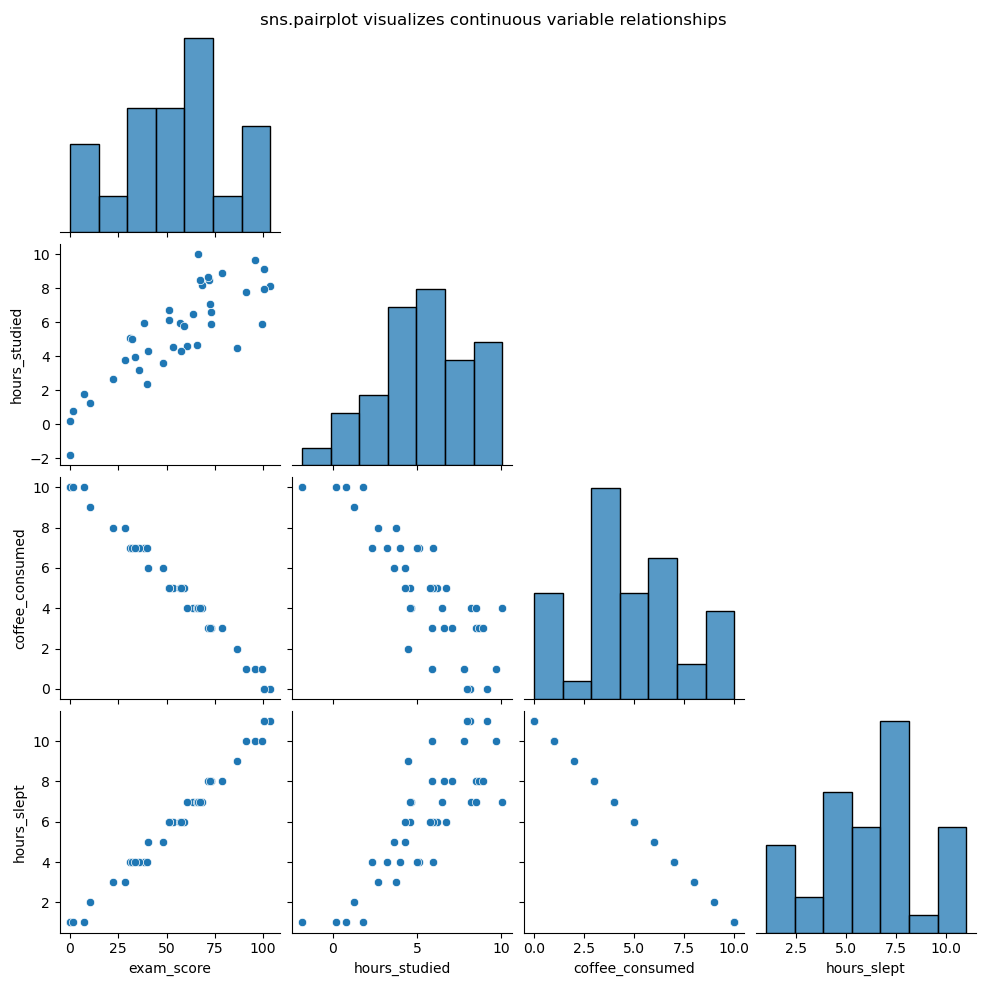

In [94]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()

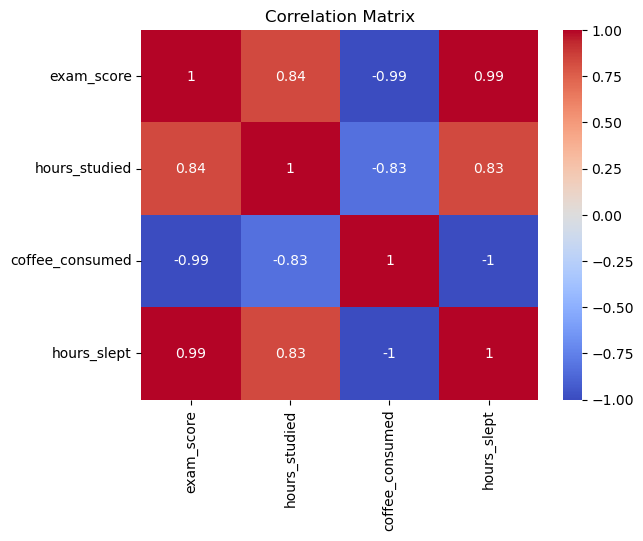

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

# exclude columns with string values
df_no_strings = df.select_dtypes(exclude=['object'])

sns.heatmap(df_no_strings.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()